# Lecture 06-22-2021 -- Part b

## Today we will cover
 - The math package
 - The NumPy package
 - Plotting
 
## Today's homework will be ...

Create a version of the chutes and ladders game for python.
 
For more detail on python please see the Purdue DataMine web link: <a href="https://thedatamine.github.io/the-examples-book/python.html" target="_blank">Data Mine on Python</a>

## The math package
Python provides many modules designed for specialized programming tasks. See: <a href="https://pypi.org" target="_blank">The Python Package Index</a>.

The math package contains trigonometric, exponential, logarithmic, hyperbolic, and special functions. It also contains a number of useful constants such as `pi` and `e`.

## People actually used to plot graphs like this on line printers ... (1980s)

In [1]:
import math
P = math.pi;

In [2]:
# An old fashioned sine wave plot.
N = 50;
for k in range(2*N):
    t = 2*P*k/N
    s = 1 + math.sin(t)
    n = math.ceil(30*s)
    x = ''
    i = 1
    while i < n:
        x = x + ' '
        i += 1
    x = x + '+'
    print(x)

                             +
                                 +
                                     +
                                         +
                                            +
                                               +
                                                  +
                                                     +
                                                       +
                                                         +
                                                          +
                                                           +
                                                           +
                                                           +
                                                           +
                                                          +
                                                         +
                                                       +
                                                     +

Mercifully there have been improvements in plotting software and other python packages are available.

### Let's take a short break and when we come back let's have you all modify the 1980s-era line printer plotting code to add cosine to the plot using `o` as a point marker ...

## My Solution ...

In [3]:
# An old fashioned sine wave plot.
N = 50;
for k in range(2*N):
    t = 2*P*k/N
    s = 1 + math.sin(t)
    c = 1 + math.cos(t)
    n = math.ceil(30*s)
    m = math.ceil(30*c)
    x = ''
    i = 1
    if m < n:
        while i < m:
            x = x + ' '
            i += 1
        x = x + 'o'
        i += 1
        while i < n:
            x = x + ' '
            i += 1
        x = x + '+'
    else:
        while i < n:
            x = x + ' '
            i += 1
        x = x + '+'
        i += 1
        while i < m:
            x = x + ' '
            i += 1
        x = x + 'o'    
    print(x)

                             +                             o
                                 +                         o
                                     +                     o
                                         +               o
                                            +           o
                                               +      o
                                                  +o
                                                 o   +
                                              o        +
                                          o              +
                                       o                  +
                                   o                       +
                               o                           +
                            o                              +
                        o                                  +
                    o                                     +
                 o                                      

## The NumPy Package

All data manipulated by a computer is represented in binary. In otherwords, via one method or another, all data -- temperature sensor readings, hourly barometric pressure from your Davis weather station, an audio file, images from your Bushnell game camera, a yield map -- are represented as arrays of numbers.

**NumPy (Numerical Python)** provides an efficient interface to store and compute on dense data buffers. NumPy arrays are much more efficient than Python's built-in list data type.

See: <a href="http://www.numpy.org" target="_blank">The Numpy Package</a>.

In [4]:
# Import the numpy package. This command allows us to refer to numpy
# commands using the shorthand "np".
import numpy as np

## Plotting examples with Matplotlib
A better way to plot. Who says there has been no progress in the world since 1970?

In [5]:
# Import matplotlib and define a shorthand
import matplotlib as mpl

In [6]:
x = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10]);
y = np.array([3, 1, 6, 5, 4, 11, -1, 1, 2, 6]);

y

array([ 3,  1,  6,  5,  4, 11, -1,  1,  2,  6])

In [7]:
import matplotlib.pyplot as plt
plt.style.available[:10]

['bmh',
 'seaborn-dark',
 'ggplot',
 'seaborn-notebook',
 'seaborn-dark-palette',
 'seaborn-talk',
 'Solarize_Light2',
 'fivethirtyeight',
 'grayscale',
 'seaborn-pastel']

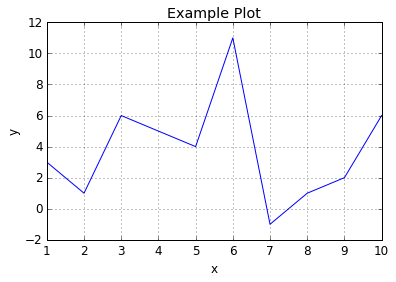

In [8]:
fig = plt.figure()
plt.style.use('classic')
plt.plot(x, y)
plt.title("Example Plot")
plt.xlabel("x")
plt.ylabel("y")
plt.grid()

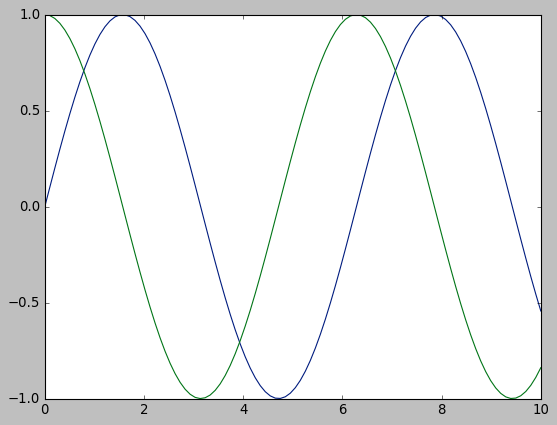

In [9]:
x = np.linspace(0, 10, 100)
fig2 = plt.figure()
plt.style.use('seaborn-dark-palette')
plt.plot(x, np.sin(x))
plt.plot(x, np.cos(x))


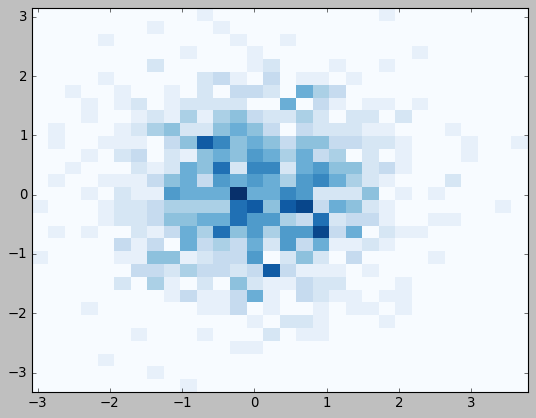

In [10]:
x = np.random.randn(1000)
y = np.random.randn(1000)

plt.hist2d(x, y, bins=30, cmap='Blues');

## The Chutes and Ladders Game ...

Prof. Buckmaster introduced the chutes and ladders game as an example of computing using Excel. The typical game board, containing 100 squares, is shown below.

<img align="left" src='Figs/Chutes&LaddersImage.png' width="300"/>

### Short version of the rules:

1. Assume there are N players, who have been ordered according to the order in which they will play by some random means (e.g., by rolling the dice, drawing straws, etc.)

2. Players all start at position 0.

3. At time k (k = 0, 1, 2, ...) the positions of the N players are indicated by p_n(k) for n = 1, 2, 3, ..., N.

4. Starting with player 1, each player throws a die and adds the value shown on the die to his position, i.e., p_1(k+1) = p_1(k) + {the roll of the die}. Then the player moves to that position on the board. If there is no chute or ladder at the new position, he remains there and his turn ends. On the other hand, if there is a chute or a ladder at the new position, the player must climb the ladder or fall down the chute as the case may be .... this change then yields the new position.

5. The first player to reach position 100 exactly wins the game. If a player rolls the die and computes a new position that would take her past 100, then the roll is voided and she remains at her original position.

### Following is a function which rolls the die and computes the new position of a player.

In [11]:
import random
from random import Random

random.seed(a=None,version=2)

In [12]:
# This needs to be included for the random drawing of numbers from
# 1 to 6 simulating the throw of a die.
import random
from random import Random

random.seed(a=None,version=2)

# This dictionary stores the chutes and ladders board.
CandLTable = {1:38, 4:14, 9:31, 16:6, 21:42, 28:84, 36:44, 47:26, 49:11, 51:67,
             56:53, 63:19, 64:60, 71:91, 80:100, 87:24, 93:73, 95:75, 98:78}

# The function to make a move
def CandL_make_a_move(position,CandLTable):
    rand = Random(None)
    roll = rand.randint(1, 6)
    if position + roll > 100:
        return position
    position += roll
    position = CandLTable.get(position, position)
    return position

# HW Problem: Program Chutes and Ladders Game

Write a program which plays a game between two people until one wins and produces a record of the game play.

If you have time convert your single game code into a function and then write a program to play a large number of games one after another keeping a record of who won and how long the game lasted. Then compute statistics and/or histograms.

Finally, if you still can't sleep explore how changes to the positions of chutes and ladders might change the game.